In [54]:
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from konlpy.tag import Okt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib
from tensorflow.keras.preprocessing.sequence import pad_sequences
from konlpy.tag import Okt
import re
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

### 데이터 구성

In [55]:
ice = pd.read_excel("C:\\Users\\user\\Desktop\\hyunhee\\learning\\text\\iscream(크롤링).xlsx")

In [56]:
ice

,Unnamed: 0,제목,시간,날짜,별점,리뷰제목,리뷰내용,연수분야,가격,대상
0,0,흔들리지 않는 교실을 위한 단호한 학급운영,30차시,2024-06-13,5,알찬 놀이교실 운영에 도움!,"쏭쌤과 이종대왕 샘! 너무 대단하시고 감사합니다. 평소에 영상으로 접하다가 알짜배기 수업놀이, 학급놀이를 정리하고 실제 활용할 수 있는 놀이들을 구성해주셔서 많은 도움이 될 것 같습니다! 다음에 2탄 연수를 바라며~",학급경영,"85,000원",유초등
1,1,다양한 재료로 쉽게 따라 하는 캘리그라피,15차시,2024-06-13,5,연습이 필요합니다.,"말 그대로 글씨 연습이네요. 많이 연습해야 하는 연수입니다. 글씨를 쓰는 동안 마음도 차분해지고 머리도 맑아지는 기분이었습니다. 교재를 굳이 사지 않아도 다운받아 연습할 수 있는 교재가 있었네요. 교재 구입하며 받은 액자, 뱃지 등의 재료들은 글씨가 예쁘지 않아 사용하지 못했습니다. 한 번쯤 들어봐도 좋을 듯 합니다.",자기계발,"40,000원",전체대상
2,2,"기초학력교육, 관계형성이 먼저다.",15차시,2024-06-13,5,딱딱할 줄 알았으나 부드러운 강의 내용,"기초학력 교육이라 그래서, 이미 알고 있는 내용을 가르칠 것이라 생각해서 별 기대없이 들었던 연수였습니다. 그런데 기초학력에 도움되는 사이트 설명이나 부진아 들에게 도움이 되는 다양한 보드게임을 소개해주셔서 재밌게 들었습니다. 이렇게 학생들이 흥미를 가질 만한 지도 내용을 소개해주셔서 실제로 활용할 때 도움이 많이 될 것 같아요!",학습지도,"40,000원",유초등
3,3,시크릿 플레이리스트 슈퍼콘서트,30차시,2024-06-13,5,문해력이란?,요즘 교육적 이슈가 되고 문해력에 대해서 막연히 알고 있던 것을 넘어서 바르게 이해할 수 있는 기회가 되었음. 학급내에서 너무나 많은 차이를 보이는 아이들의 읽기 능력의 배경을 이해하고 지도하는데 도움이 됨.,자기계발,"85,000원",전체대상
4,4,일본 현지 성우와 함께 배우는 마법의 360문장,30차시,2024-06-13,5,유익하고 보람있는 일본어 연수,"다양한 문장을 통해 어휘와 문법을 자세히 배울 수 있어 유익하고 보람있는 일본어 연수라고 생각됩니다. 특히, 다양한 성우를 통해 생생한 일본어는 다른 연수에 없는 알찬 구성이라고 사료됩니다. 마지막에 존경어와 겸양어만 추가된다면 더욱 완벽한 중급 일본어 연수가 되리라 확신합니다.",어학,"85,000원",전체대상
...,...,...,...,...,...,...,...,...,...,...
2670,2670,나만의 이미지 가치를 높여주는 퍼스널 컬러 스타일링,15차시,2023-12-13,5,펄스널 컬러에 대해 알게됐어요,펄스널 컬러에 대해 알게됐어요,자기계발,"40,000원",전체대상
2671,2671,아는 만큼 즐기는 올 댓 와인,15차시,2023-12-13,5,짱짱,와인에 대해 알게됐어요,자기계발,"40,000원",전체대상
2672,2672,"Made at Home, 나만의 작은 홈카페 & 홈베이킹",15차시,2023-12-13,5,쉽게 따라할 수 있는 연수,기초부터 차근차근 잘 알려주셔서 베이킹을 처음 해보는 사람도 따라할 수 있도록 잘 설명해 주십니다.,자기계발,"40,000원",전체대상
2673,2673,쏭쌤&이종대왕의 리얼 놀이로 푸는 초등학급경영,30차시,2023-12-13,5,재미있고 유익한 연수,실제 학급에 바로 적용할 수 있는 여러 놀이를 배울 수 있어 정말 좋았습니다.,학급경영,"75,000원",유초등


In [57]:
ice['가격'].unique()

array(['85,000원', '40,000원', '75,000원', '50,000원', '75,000', '65,000원',
       '35,000원', '15,000원', '오픈준비중', '40,000', '12,000원', '130,000원',
       '무료', '140,000원', '접속불가', '50,000', '21,000원', '1,000', '30,000원',
       '1,000원'], dtype=object)

In [58]:
ice[ice['별점'] == 4].shape[0]

71

In [59]:
ice['연수분야'].value_counts()

연수분야
자기계발    770
학습지도    571
생활지도    424
ICT     299
어학      276
교과지도    216
학급경영    119
Name: count, dtype: int64

In [60]:
ice['제목'].value_counts()

제목
교사를 위한 구글 활용법(입문자편)          81
생각을 꺼내는 교육, 이제는 IB 시대        72
가장 쉬운 수업도구, 패들렛과 띵커벨         54
공간의 재발견, 정리의 힘               53
큰별쌤 최태성의 별★별한국사              50
                             ..
일본어 초급 탈출! 마법의 150회화          1
인성, 스승에게 묻다                   1
대입이 뭐니? 2022 입시 찐 전략          1
SW&AI 코딩수업의 모든 것 - 언플러그드      1
향기로운 반짝임을 만나는 곳, 힐링 캔들 공방     1
Name: count, Length: 334, dtype: int64

In [61]:
from matplotlib import font_manager, rc

font_path = 'C:\\Windows\\Fonts\\H2GTRM.TTF'  # 시스템에 따라 폰트 경로를 수정하세요.
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

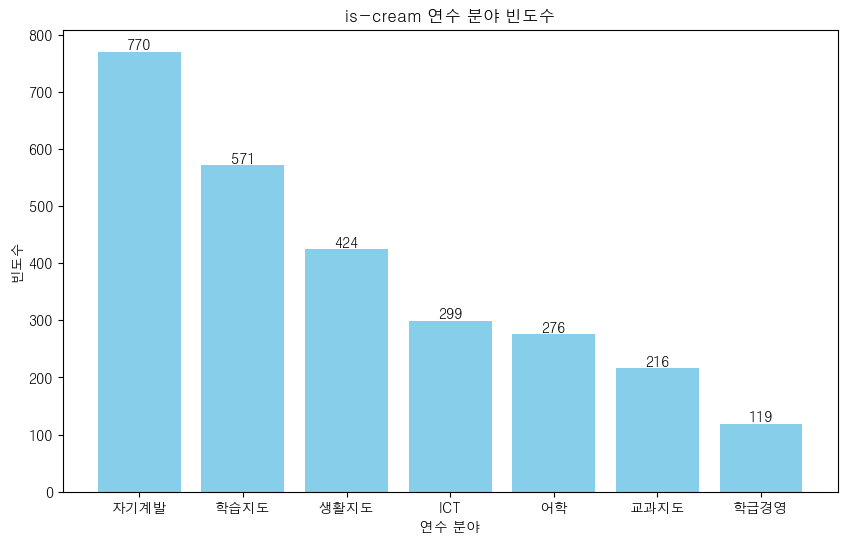

In [62]:
# '연수 분야' 값의 빈도 계산
value_counts = ice['연수분야'].value_counts()

# 그래프 시각화
plt.figure(figsize=(10, 6))
bars = plt.bar(value_counts.index, value_counts.values, color='skyblue')

# 각 막대 위에 값 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.1, yval, ha='center', va='bottom')

# 제목 및 레이블 설정
plt.title('is-cream 연수 분야 빈도수')
plt.xlabel('연수 분야')
plt.ylabel('빈도수')

# 그래프 출력
plt.show()

In [63]:
ice[ice['제목'] == '교사를 위한 구글 활용법(입문자편)']

,Unnamed: 0,제목,시간,날짜,별점,리뷰제목,리뷰내용,연수분야,가격,대상
56,56,교사를 위한 구글 활용법(입문자편),15차시,2024-06-11,5,구글 쉬워요,배워보니 다양하게 사용할 수 있어 추천합니다.,ICT,"40,000원",전체대상
129,129,교사를 위한 구글 활용법(입문자편),15차시,2024-06-05,5,유익한 연수,아이스크림에서 제공하는 다양한 콘텐츠들의 기능을 익혀 수업에 활용할 수 있는 연수였습니다. 실전에서도 사용해보도록 하겠습니다.,ICT,"40,000원",전체대상
143,143,교사를 위한 구글 활용법(입문자편),15차시,2024-06-05,5,쓸모있는 연수,내용이 유용했습니다. 교사들이 업무나 수업에서 활용하기 좋은 구글 활용팁이 가득한 연수네요. 감사합니다.,ICT,"40,000원",전체대상
154,154,교사를 위한 구글 활용법(입문자편),15차시,2024-06-04,4,구글 활용법 후기,구글 활용 방법을 알 수 있어 좋았습니다.,ICT,"40,000원",전체대상
255,255,교사를 위한 구글 활용법(입문자편),15차시,2024-05-27,5,업무와 수업에 활용이 좋아요.,"무료로 구글을 사용할 수 있는 기능들이 참 많더라구요.._x000D_\n아이들과 수업 시간에 활용하기도 좋고, 업무 처리에도 편하게 사용할 수 있는 것들이 있어요. _x000D_\n연수 후 구글 기능들을 유용하게 잘 활용 하고 있어요.",ICT,"40,000원",전체대상
...,...,...,...,...,...,...,...,...,...,...
2602,2602,교사를 위한 구글 활용법(입문자편),15차시,2023-12-14,5,구글,구글을 여러 기능을 살펴 볼 수 있어 유용하였습니다.,ICT,"40,000원",전체대상
2611,2611,교사를 위한 구글 활용법(입문자편),15차시,2023-12-14,5,구글 입문자용으로 좋아요.,구글에 대한 다양한 활용법을 쉽게 알려 주셔서 많은 도움이 되었습니다. 강추합니다.,ICT,"40,000원",전체대상
2620,2620,교사를 위한 구글 활용법(입문자편),15차시,2023-12-14,5,몰랐던 기능이 많네요.,구글이 보물 창고네요. 알려주신 대로 잘 활용할게요.,ICT,"40,000원",전체대상
2640,2640,교사를 위한 구글 활용법(입문자편),15차시,2023-12-13,5,유익한 연수!!,실제 업무와 수업에 활용할 수 있는 구글의 다양한 기능을 알 수있어 좋았습니다. 입문자의 수준에 맞게 쉽고 차근차근 알려주셔서 도움이 많이 될 것 같아요.,ICT,"40,000원",전체대상


In [64]:
review_content =ice[ice['제목'] == '교사를 위한 구글 활용법(입문자편)']['리뷰내용']

# pandas의 텍스트 출력 옵션 조정
pd.set_option('display.max_colwidth', None)  # 열 너비를 자동으로 조정하여 전체 내용 표시

# 리뷰내용 출력
print(review_content.to_string(index=False))

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     배워보니 다양하게 사용할 수 있어 추천합니다.
                         

##### 강의 제목에 따른 정리

In [65]:
# 제목의 유니크 개수 확인
unique_titles = ice['제목'].unique()
unique_title_count = len(unique_titles)

print(f"제목의 유니크 개수: {unique_title_count}")

제목의 유니크 개수: 334


In [66]:
# 그룹화하여 제목별로 연수 분야, 시간, 가격, 대상 컬럼의 정보를 얻음
title_info = ice.groupby('제목').agg({
    '연수분야': 'first',  # 제목별로 첫 번째 연수 분야
    '시간': 'first',       # 제목별로 첫 번째 시간
    '가격': 'first',       # 제목별로 첫 번째 가격
    '대상': 'first'        # 제목별로 첫 번째 대상
}).reset_index()

In [67]:
print("\n각 제목에 따른 연수 분야, 시간, 가격, 대상:")
title_info


각 제목에 따른 연수 분야, 시간, 가격, 대상:


,제목,연수분야,시간,가격,대상
0,100배로 즐기는 세계문화유산 여행,자기계발,30차시,"75,000원",전체대상
1,15초 따라 하기 왕초보 영어,어학,30차시,"75,000원",전체대상
2,"4R'S로 키우는 힘, 기초학력교육",학습지도,30차시,"75,000원",유초등
3,4대폭력 예방교육,생활지도,4차시,"12,000원",전체대상
4,5분 만에 끝내는 여행영어,어학,7차시,무료,전체대상
...,...,...,...,...,...
329,혼자서 끝내는 토익,어학,11차시,무료,전체대상
330,화목한 우리 집 존중하는 부부 되기,자기계발,30차시,"75,000원",전체대상
331,회복적 생활교육을 위한 교실 상담,생활지도,30차시,"75,000원",전체대상
332,흔들리지 않는 교실을 위한 단호한 학급운영,학급경영,30차시,"85,000원",유초등


#### 시간 및 별점 이진화

In [68]:
ice['시간_이진화'] = ice['시간'].apply(lambda x: 1 if x in [30, 60] else 0)

In [69]:
ice['별점_이진화'] = ice['별점'].apply(lambda x: 1 if x == 5 else 0)

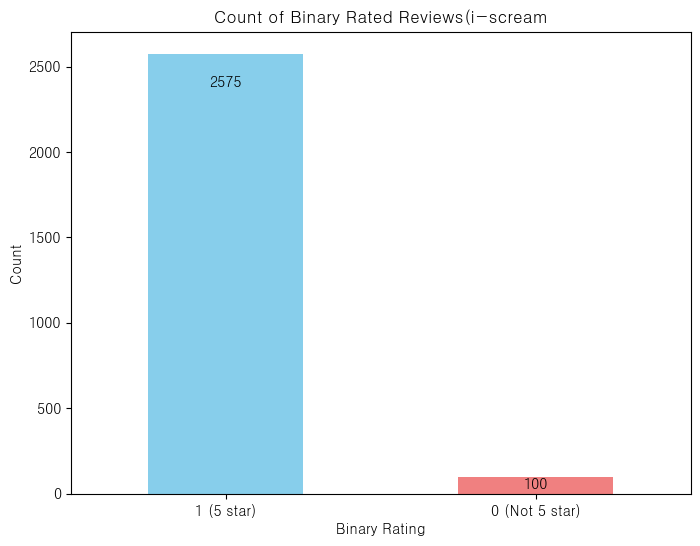

In [70]:
binary_counts = ice['별점_이진화'].value_counts()

plt.figure(figsize=(8, 6))

ax = binary_counts.plot(kind='bar', color=['skyblue', 'lightcoral'])

# 막대 위에 개수 표시
for i, count in enumerate(binary_counts):
    ax.text(i, count - 0.05 * count, str(count), ha='center', va='top')
    
binary_counts.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Count of Binary Rated Reviews(i-scream')
plt.xlabel('Binary Rating')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['1 (5 star)', '0 (Not 5 star)'], rotation=0)
plt.show()

### 텍스트 분석

In [71]:
# Okt 형태소 분석기 사용
okt = Okt()

# 품사 태그 딕셔너리 초기화
pos_dict = {tag: 0 for tag in okt.tagset.keys()}

# 품사별 형태소 수집용 리스트
punctuations = []
foreign = []
determiners = []
conjunctions = []
alphas = []
exclamations = []
korean_particles = []
numbers = []
josa = []
suffix = []
adverb = []
adjective = []
verb = []
noun = []
emoi = []

# 상위 1000개 후기에서 품사 빈도 계산 및 형태소 수집
for doc in ice['리뷰내용'][:1000]:
    doc_pos = okt.pos(str(doc))
    for word, pos in doc_pos:
        if pos in pos_dict:
            pos_dict[pos] += 1
            if pos == 'Punctuation':
                punctuations.append(word)
            elif pos == 'Foreign':
                foreign.append(word)
            elif pos == 'Determiner':
                determiners.append(word)
            elif pos == 'Conjunction':
                conjunctions.append(word)
            elif pos == 'Alpha':
                alphas.append(word)
            elif pos == 'Exclamation':
                exclamations.append(word)
            elif pos == 'KoreanParticle':
                korean_particles.append(word)
            elif pos == 'Number':
                numbers.append(word)
            elif pos == 'Josa':
                josa.append(word)
            elif pos == 'Suffix':
                suffix.append(word)
            elif pos == 'Adverb':
                adverb.append(word)
            elif pos == 'Adjective':
                adjective.append(word)
            elif pos == 'Verb':
                verb.append(word)
            elif pos == 'Emoi':
                emoi.append(word)
            elif pos == 'Noun':
                noun.append(word)

# 품사 빈도 출력
print("품사 빈도:", pos_dict)

품사 빈도: {'Adjective': 3424, 'Adverb': 545, 'Alpha': 1529, 'Conjunction': 73, 'Determiner': 51, 'Eomi': 5, 'Exclamation': 15, 'Foreign': 743, 'Hashtag': 0, 'Josa': 6833, 'KoreanParticle': 18, 'Noun': 14561, 'Number': 863, 'PreEomi': 0, 'Punctuation': 3873, 'ScreenName': 0, 'Suffix': 884, 'Unknown': 0, 'Verb': 5818}


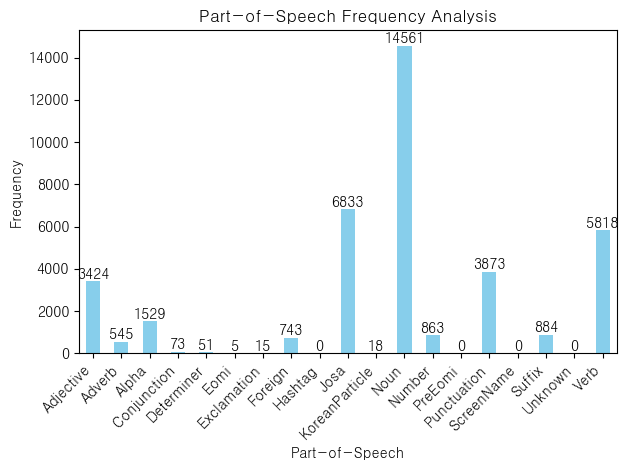

In [72]:
# 데이터프레임 생성 및 그래프 그리기
df = pd.DataFrame(list(pos_dict.items()), columns=['Part-of-Speech', 'Frequency'])
ax = df.plot.bar(x='Part-of-Speech', y='Frequency', legend=False, color='skyblue')

# 막대 위에 값 표시
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 5), textcoords='offset points')

plt.xlabel('Part-of-Speech')
plt.ylabel('Frequency')
plt.title('Part-of-Speech Frequency Analysis')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

In [73]:
import random


# 품사별 예시 단어 리스트 생성 함수 (중복 제거)
def get_pos_samples(pos_list, pos_name):
    unique_words = list(set(pos_list))  # 중복 제거
    if len(unique_words) > 0:
        samples = random.sample(unique_words, min(5, len(unique_words)))
    else:
        samples = []
    return pd.DataFrame({pos_name: samples})
    
# 각 품사별 예시 단어 데이터프레임 생성
punctuations_df = get_pos_samples(punctuations, 'Punctuation')
foreign_df = get_pos_samples(foreign, 'Foreign')
determiners_df = get_pos_samples(determiners, 'Determiner')
conjunctions_df = get_pos_samples(conjunctions, 'Conjunction')
alphas_df = get_pos_samples(alphas, 'Alpha')
exclamations_df = get_pos_samples(exclamations, 'Exclamation')
korean_particles_df = get_pos_samples(korean_particles, 'KoreanParticle')
numbers_df = get_pos_samples(numbers, 'Number')
josa_df = get_pos_samples(josa, 'Josa')
suffix_df = get_pos_samples(suffix, 'Suffix')
adverb_df = get_pos_samples(adverb, 'Adverb')
adjective_df = get_pos_samples(adjective, 'Adjective')
verb_df = get_pos_samples(verb, 'Verb')
emoi_df = get_pos_samples(emoi, 'Emoi')
noun_df = get_pos_samples(noun, 'Noun')

# 데이터프레임 병합
pos_samples_df = pd.concat([punctuations_df, foreign_df, determiners_df, conjunctions_df, alphas_df, 
                            exclamations_df, korean_particles_df, numbers_df, josa_df, suffix_df, 
                            adverb_df, adjective_df, verb_df, emoi_df, noun_df], axis=1)

transposed_df = pos_samples_df.T

In [74]:
transposed_df

,0,1,2,3,4
Punctuation,-,",",~~~,.!,--
Foreign,의,차,씩,\n,\t
Determiner,이,두,한,내,저
Conjunction,그러나,그렇지만,그렇다고,그런데,하지만
Alpha,ai,GPT,IB,re,PBL
Exclamation,야,아,하,정말,NaN
KoreanParticle,ㅎ,ㅎㅎㅎ,ㅠ,ㄴㅅ,ㅇ
Number,2~3시간,1년,20,000,15
Josa,롭고,과,야,으로,스럽지
Suffix,계,형,씨,화,놀이


In [75]:
pos_samples_df

,Punctuation,Foreign,Determiner,Conjunction,Alpha,Exclamation,KoreanParticle,Number,Josa,Suffix,Adverb,Adjective,Verb,Emoi,Noun
0,-,의,이,그러나,ai,야,ㅎ,2~3시간,롭고,계,어느,흥미로운,하며,NaN,연수고
1,",",차,두,그렇지만,GPT,아,ㅎㅎㅎ,1년,과,형,되게,느긋하게,받는다면,NaN,판례
2,~~~,씩,한,그렇다고,IB,하,ㅠ,20,야,씨,없이,좋지,찾아오는,NaN,옆반
3,.!,\n,내,그런데,re,정말,ㄴㅅ,000,으로,화,아직도,다양하게,되더라고요,NaN,향상
4,--,\t,저,하지만,PBL,NaN,ㅇ,15,스럽지,놀이,끄적,궁금하다면,걸릴,NaN,제대로


### 리뷰내용 전처리

In [76]:
okt = Okt()

# 특정 품사 리스트 정의
unwanted_pos = [ 'Adverb', 'Alpha', 'Counjunction', 'Determiner', 'Emoi' ,'Exclamation', 'Foreign', 'Josa', 'Noun','Punctuation' , 'Suffix' ,'Verb', 'KoreanParticle']

# 불용어 리스트
stopwords = ['되어다', '연수', '있다', '오랜', '어쩔', '어느', '을', '이다', '다', '네', '아', '니', '가', 
             '님', '의', '가', '이', '은', '는', '에', '를', '으로', '도', '은', '로', '한', 
             '그리고', '또한', '하다', '되다', '이다', '고', '까지', '에서', '만', '밖에', '때문',
             '위해', '처럼', '안', '속', '사람', '중', '좀','들','같다','좋다', '들다', '자다', '보다','많다'
            ,'다양하다', '어떻다']


In [77]:
def preprocess_text(text):
    # 특수문자 및 영어 제거
    text = re.sub(r'[^가-힣\s]', '', text)
    
    # 형태소 분석 및 불용어 제거
    words = okt.pos(text, stem=True)  # 형태소 분석
    words = [word for word, pos in words if word not in stopwords and pos not in unwanted_pos]  # 불용어 및 특정 품사 제거
    
    return ' '.join(words)

In [78]:
# 후기 칼럼 전처리
ice['리뷰내용_전처리'] = ice['리뷰내용'].apply(preprocess_text)

In [79]:
ice

,Unnamed: 0,제목,시간,날짜,별점,리뷰제목,리뷰내용,연수분야,가격,대상,시간_이진화,별점_이진화,리뷰내용_전처리
0,0,흔들리지 않는 교실을 위한 단호한 학급운영,30차시,2024-06-13,5,알찬 놀이교실 운영에 도움!,"쏭쌤과 이종대왕 샘! 너무 대단하시고 감사합니다. 평소에 영상으로 접하다가 알짜배기 수업놀이, 학급놀이를 정리하고 실제 활용할 수 있는 놀이들을 구성해주셔서 많은 도움이 될 것 같습니다! 다음에 2탄 연수를 바라며~",학급경영,"85,000원",유초등,0,1,대단하다
1,1,다양한 재료로 쉽게 따라 하는 캘리그라피,15차시,2024-06-13,5,연습이 필요합니다.,"말 그대로 글씨 연습이네요. 많이 연습해야 하는 연수입니다. 글씨를 쓰는 동안 마음도 차분해지고 머리도 맑아지는 기분이었습니다. 교재를 굳이 사지 않아도 다운받아 연습할 수 있는 교재가 있었네요. 교재 구입하며 받은 액자, 뱃지 등의 재료들은 글씨가 예쁘지 않아 사용하지 못했습니다. 한 번쯤 들어봐도 좋을 듯 합니다.",자기계발,"40,000원",전체대상,0,1,맑다 예쁘다 못
2,2,"기초학력교육, 관계형성이 먼저다.",15차시,2024-06-13,5,딱딱할 줄 알았으나 부드러운 강의 내용,"기초학력 교육이라 그래서, 이미 알고 있는 내용을 가르칠 것이라 생각해서 별 기대없이 들었던 연수였습니다. 그런데 기초학력에 도움되는 사이트 설명이나 부진아 들에게 도움이 되는 다양한 보드게임을 소개해주셔서 재밌게 들었습니다. 이렇게 학생들이 흥미를 가질 만한 지도 내용을 소개해주셔서 실제로 활용할 때 도움이 많이 될 것 같아요!",학습지도,"40,000원",유초등,0,1,그런데 재밌다
3,3,시크릿 플레이리스트 슈퍼콘서트,30차시,2024-06-13,5,문해력이란?,요즘 교육적 이슈가 되고 문해력에 대해서 막연히 알고 있던 것을 넘어서 바르게 이해할 수 있는 기회가 되었음. 학급내에서 너무나 많은 차이를 보이는 아이들의 읽기 능력의 배경을 이해하고 지도하는데 도움이 됨.,자기계발,"85,000원",전체대상,0,1,막연하다
4,4,일본 현지 성우와 함께 배우는 마법의 360문장,30차시,2024-06-13,5,유익하고 보람있는 일본어 연수,"다양한 문장을 통해 어휘와 문법을 자세히 배울 수 있어 유익하고 보람있는 일본어 연수라고 생각됩니다. 특히, 다양한 성우를 통해 생생한 일본어는 다른 연수에 없는 알찬 구성이라고 사료됩니다. 마지막에 존경어와 겸양어만 추가된다면 더욱 완벽한 중급 일본어 연수가 되리라 확신합니다.",어학,"85,000원",전체대상,0,1,자세하다 유익하다 생생하다 없다 알차다 완벽하다
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2670,2670,나만의 이미지 가치를 높여주는 퍼스널 컬러 스타일링,15차시,2023-12-13,5,펄스널 컬러에 대해 알게됐어요,펄스널 컬러에 대해 알게됐어요,자기계발,"40,000원",전체대상,0,1,
2671,2671,아는 만큼 즐기는 올 댓 와인,15차시,2023-12-13,5,짱짱,와인에 대해 알게됐어요,자기계발,"40,000원",전체대상,0,1,
2672,2672,"Made at Home, 나만의 작은 홈카페 & 홈베이킹",15차시,2023-12-13,5,쉽게 따라할 수 있는 연수,기초부터 차근차근 잘 알려주셔서 베이킹을 처음 해보는 사람도 따라할 수 있도록 잘 설명해 주십니다.,자기계발,"40,000원",전체대상,0,1,
2673,2673,쏭쌤&이종대왕의 리얼 놀이로 푸는 초등학급경영,30차시,2023-12-13,5,재미있고 유익한 연수,실제 학급에 바로 적용할 수 있는 여러 놀이를 배울 수 있어 정말 좋았습니다.,학급경영,"75,000원",유초등,0,1,


In [80]:
ice['리뷰내용_전처리'][533]

'어렵다 안되다 어렵다 높다 필요하다 무덥다 부러워하다 강하다'

In [81]:
ice['리뷰내용'][533]

'연수가 어렵고 내용이 이해가 안되는 부분도 있어  이수하기가 어렵지만 대신에 성취감도 높네요. 한국어강사 자격 취득을하여 한국어가 필요한 사람들에게 강의를 하고 싶습니다. 한국어 강의를 하는 수업을 보니 우리가 예전에 영어를 배우려고 무던히도 노력하고 영어권 국민들은 영어를 안배워도 되니 부러워했는데 이제는 국력이 강해져서 우리도 그들처럼 우리 모국어를 가르치는 시대가 되었다는데 자긍심이 생깁니다. 빨리 자격증을 취득하여서 우리 모국어를 널리 전파하고 싶습니다,'

#### 긍정 그룹과 부정 그룹으로 나누기 + 빈도수 + word cloud

In [82]:
positive_reviews = ice[ice['별점_이진화'] == 1]['리뷰내용_전처리']
negative_reviews = ice[ice['별점_이진화'] == 0]['리뷰내용_전처리']

In [83]:
# CountVectorizer를 사용하여 단어 빈도 계산
def get_word_frequencies(reviews):
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(reviews)
    frequencies = X.sum(axis=0).A1
    words = vectorizer.get_feature_names_out()
    return pd.DataFrame(frequencies, index=words, columns=['frequency']).sort_values(by='frequency', ascending=False)

# 긍정 그룹 단어 빈도
positive_word_frequencies = get_word_frequencies(positive_reviews)
# 부정 그룹 단어 빈도
negative_word_frequencies = get_word_frequencies(negative_reviews)

In [84]:
positive_word_frequencies

,frequency
유익하다,391
재미있다,216
필요하다,169
어렵다,163
아니다,159
...,...
시원시원하다,1
신중하다,1
심란하다,1
심심하다,1


In [85]:
positive_reviews

0                             대단하다
1                         맑다 예쁘다 못
2                          그런데 재밌다
3                             막연하다
4       자세하다 유익하다 생생하다 없다 알차다 완벽하다
                   ...            
2670                              
2671                              
2672                              
2673                              
2674                              
Name: 리뷰내용_전처리, Length: 2575, dtype: object

#### 없다 단어 포함 리뷰

In [86]:
difficult_reviews_indices = positive_reviews[positive_reviews.str.contains('없다', na=False)].index

print("\n'없다' 단어가 포함된 행 번호:")
print(difficult_reviews_indices.tolist())


'없다' 단어가 포함된 행 번호:
[4, 60, 68, 93, 103, 109, 170, 171, 174, 178, 190, 245, 295, 343, 360, 416, 418, 419, 432, 434, 440, 454, 468, 489, 492, 507, 515, 576, 583, 657, 678, 681, 706, 719, 740, 749, 757, 758, 759, 791, 827, 853, 869, 884, 902, 913, 937, 938, 947, 953, 975, 984, 991, 1021, 1022, 1033, 1034, 1045, 1046, 1058, 1132, 1133, 1134, 1150, 1178, 1182, 1191, 1198, 1204, 1232, 1236, 1244, 1284, 1285, 1292, 1310, 1317, 1320, 1322, 1366, 1380, 1383, 1401, 1405, 1411, 1442, 1460, 1461, 1472, 1508, 1513, 1519, 1521, 1579, 1614, 1632, 1649, 1692, 1711, 1762, 1777, 1790, 1799, 1807, 1849, 1851, 1865, 1897, 1906, 1914, 1925, 1946, 1963, 1971, 1976, 1990, 2034, 2045, 2059, 2151, 2168, 2224, 2254, 2326, 2327, 2328, 2331, 2364, 2437, 2438, 2451, 2465, 2504, 2512, 2533, 2541, 2546, 2547]


In [87]:
# 지정된 행 번호
indices = [4, 60, 68, 93, 103, 109, 170, 171, 174, 178, 190, 245, 295, 343, 360, 416, 418, 419, 432, 434, 440, 454, 468, 489, 492, 507, 515, 576, 583]

# 지정된 행 번호의 '리뷰내용' 추출
selected_reviews = ice.loc[indices, '리뷰내용']

# pandas 출력 옵션 설정
pd.set_option('display.max_colwidth', None)

In [88]:
selected_reviews

4                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [89]:
# 상위 10개 단어 출력
print("긍정 그룹 상위 10개 단어:")
print(positive_word_frequencies.head(10))

긍정 그룹 상위 10개 단어:
      frequency
유익하다        391
재미있다        216
필요하다        169
어렵다         163
아니다         159
없다          154
유용하다        126
자세하다        103
새롭다          96
즐겁다          83


In [90]:
negative_reviews

10                       어렵다
72                          
88              힘들다 어렵다 충분하다
105                     유익하다
116                   지 적합하다
                ...         
2599                        
2604                헷갈리다 어렵다
2615                        
2616            필요하다 없다 여전하다
2624    아깝다 어렵다 없다 약하다 안되다 오
Name: 리뷰내용_전처리, Length: 100, dtype: object

#### 재미있다 단어 포함 리뷰

In [91]:
difficult_reviews_indices = negative_reviews[negative_reviews.str.contains('재미있다', na=False)].index

print("\n'재미있다' 단어가 포함된 행 번호:")
print(difficult_reviews_indices.tolist())


'재미있다' 단어가 포함된 행 번호:
[476, 602, 622, 868, 909, 910, 1365, 2255]


In [92]:
# 지정된 행 번호
indices = [476, 602, 622, 868, 909, 910, 1365, 2255]

# 지정된 행 번호의 '리뷰내용' 추출
selected_reviews = ice.loc[indices, '리뷰내용']

# pandas 출력 옵션 설정
pd.set_option('display.max_colwidth', None)

In [93]:
selected_reviews

476                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     재미있게 잘 들었습니다. 감사합니다.
602                                                                                                                                                                                                                                                                                                                                                                                                                                                     우선 강의가 재미있고 유익했습니다.

#### 유익하다 단어 포함 리뷰

In [94]:
difficult_reviews_indices = negative_reviews[negative_reviews.str.contains('유익하다', na=False)].index

print("\n'유익하다' 단어가 포함된 행 번호:")
print(difficult_reviews_indices.tolist())


'유익하다' 단어가 포함된 행 번호:
[105, 239, 320, 451, 602, 983, 2392]


In [95]:
# 지정된 행 번호
indices = [105, 239, 320, 451, 602, 983, 2392]

# 지정된 행 번호의 '리뷰내용' 추출
selected_reviews = ice.loc[indices, '리뷰내용']

# pandas 출력 옵션 설정
pd.set_option('display.max_colwidth', None)

selected_reviews

105                                                                                                                                                                                                                                                                                                                                                                                                                                                                          아이스크림  사이트 활용에 유익했어요.
239                                                                                                                                                                                                                                                                                                                                                                                                                                                                             유익한 연수였습니다. 추천합니다.
320                               

#### 어렵다 단어 포함 리뷰

In [96]:
# '어렵다' 단어가 포함된 행 번호 추출
difficult_reviews_indices = negative_reviews[negative_reviews.str.contains('어렵다', na=False)].index

In [97]:
# '어렵다' 단어가 포함된 행 번호 출력
print("\n'어렵다' 단어가 포함된 행 번호:")
print(difficult_reviews_indices.tolist())


'어렵다' 단어가 포함된 행 번호:
[10, 88, 523, 728, 868, 1004, 1645, 1909, 2014, 2117, 2535, 2563, 2604, 2624]


In [98]:
# 지정된 행 번호
indices = [10, 88, 523, 728, 868, 1004, 1645, 1909, 2014, 2117, 2535, 2563, 2604, 2624]

# 지정된 행 번호의 '리뷰내용' 추출
selected_reviews = ice.loc[indices, '리뷰내용']

# pandas 출력 옵션 설정
pd.set_option('display.max_colwidth', None)

In [99]:
selected_reviews

10                                                                                                                                                                                                                                                                                                                                                                                    IB에 대한 개념이해에는 도움이 되는 연수입니다. 실제 어떻게 하는 건 알기 어려워요
88                                                                                                                                                                                                                                                                                              섣불리 도전했다가 무척 힘들게 수강 했습니다._x000D_\n강의를 들으면서  실습을 함께 하려니 강의 속도를 따라잡기기 어려웠습니다._x000D_\n시간을 충분히 가지고 수강 기간 동안 시간을 잘 안배하여  집중 실습하시기를 권장합니다.
523     초보자를 위해 개념부터 차근차근 설명해주는 강의가 아니라 예시를 중심으로 빠르게 진행되는 연수여서 15시간임에도 불구하고 초반에 따라가기가 너무 힘들었다. 반복학습으로 인해 뒤로 갈수록 적응되기는 했지만 주변에 추천하기는 어렵다. _x000D_\n_x000D_\n요

In [100]:
print("\n부정 그룹 상위 10개 단어:")
print(negative_word_frequencies.head(10))


부정 그룹 상위 10개 단어:
      frequency
어렵다          19
아니다          11
없다            9
재미있다          8
안되다           8
아쉽다           8
유익하다          7
그렇다           7
힘들다           6
빠르다           6


In [101]:
# 상위 20개의 단어만 추출
top_positive_frequencies = positive_word_frequencies.head(20)
top_negative_frequencies = negative_word_frequencies.head(20)

In [102]:
# 폰트 경로 설정
font_path = 'C:\\Windows\\Fonts\\H2GTRM.TTF'  # 또는 폰트 파일의 경로를 지정합니다

def plot_wordcloud(frequencies, title):
    # WordCloud 객체 생성
    wc = WordCloud(width=1000, height=600, background_color='white', font_path=font_path)
    # 빈도 데이터를 이용하여 Word Cloud 생성
    wordcloud = wc.generate_from_frequencies(frequencies)
    
    # Word Cloud 시각화
    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=15)
    plt.axis('off')
    plt.show()


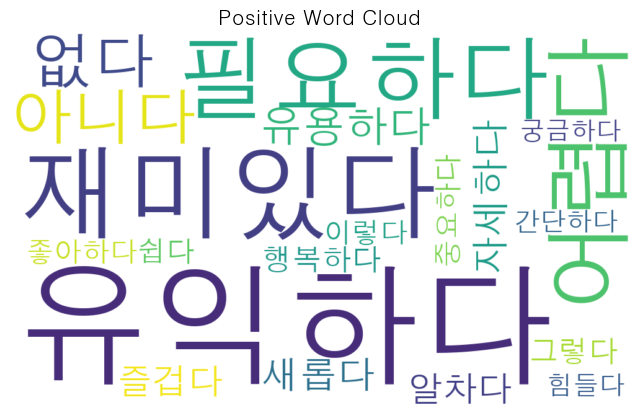

In [103]:
# 긍정 그룹 Word Cloud
plot_wordcloud(top_positive_frequencies['frequency'], 'Positive Word Cloud')

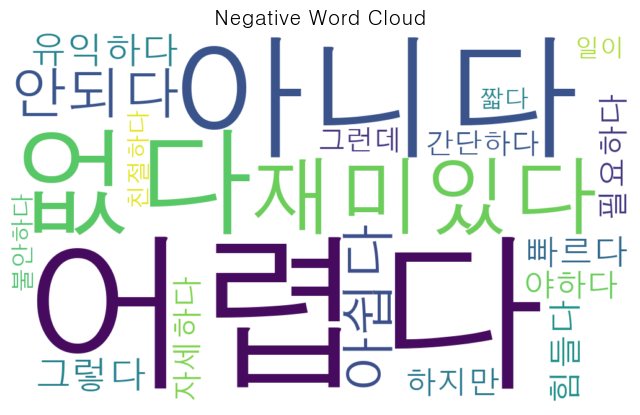

In [104]:
# 부정 그룹 Word Cloud
plot_wordcloud(top_negative_frequencies['frequency'], 'Negative Word Cloud')

### 별점 예측 모델

In [105]:
# 전처리된 후기와 이진화된 별점 준비
X = ice['리뷰내용_전처리']
y = ice['별점_이진화']

In [106]:
# NaN 값 제거
X = X.dropna()
y = y[X.index]

In [107]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=12345, shuffle=True, test_size=0.3)

In [108]:
# Tokenizer 초기화 및 피팅
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [109]:
# 텍스트를 시퀀스로 변환
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [110]:
# 시퀀스 패딩
max_length = 100
X_train_pad = pad_sequences(X_train_seq, padding='post', maxlen=max_length)
X_test_pad = pad_sequences(X_test_seq, padding='post', maxlen=max_length)

In [111]:
# Train-validation split
X_train_pad, X_val_pad, y_train, y_val = train_test_split(X_train_pad, y_train, 
                                                           random_state=12345, 
                                                           shuffle=True, 
                                                           test_size=0.5)

In [112]:
from tensorflow.keras.layers import BatchNormalization
from sklearn.utils import class_weight

model = keras.models.Sequential([
    keras.layers.Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100),
    keras.layers.LSTM(64, return_sequences=True),
    BatchNormalization(),  # 배치 정규화 추가
    keras.layers.LSTM(32, dropout=0.3, recurrent_dropout=0.3),
    keras.layers.Dense(1, activation='sigmoid')
])
# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# 콜백 정의
es = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=4)
mc = keras.callbacks.ModelCheckpoint('./best_icemodel.keras', monitor='val_accuracy', mode='max', save_best_only=True)

In [113]:
# 모델 학습

history = model.fit(
    X_train_pad, y_train, 
    epochs=30, 
    batch_size=32,  # 배치 크기 조정
    validation_data=(X_val_pad, y_val), 
    callbacks=[es, mc]
)

Epoch 1/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accuracy: 0.8559 - loss: 0.3876 - val_accuracy: 0.9647 - val_loss: 0.1574
Epoch 2/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9605 - loss: 0.1685 - val_accuracy: 0.9647 - val_loss: 0.1526
Epoch 3/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9648 - loss: 0.1535 - val_accuracy: 0.9647 - val_loss: 0.1529
Epoch 4/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9521 - loss: 0.1937 - val_accuracy: 0.9647 - val_loss: 0.1532
Epoch 5/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9610 - loss: 0.1659 - val_accuracy: 0.9647 - val_loss: 0.1527
Epoch 6/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9662 - loss: 0.1493 - val_accuracy: 0.9647 - val_loss: 0.1527


In [114]:
# 모델 평가
test_loss, test_accuracy = model.evaluate(X_test_pad, y_test)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9580 - loss: 0.1743
Test Loss: 0.1675
Test Accuracy: 0.9601


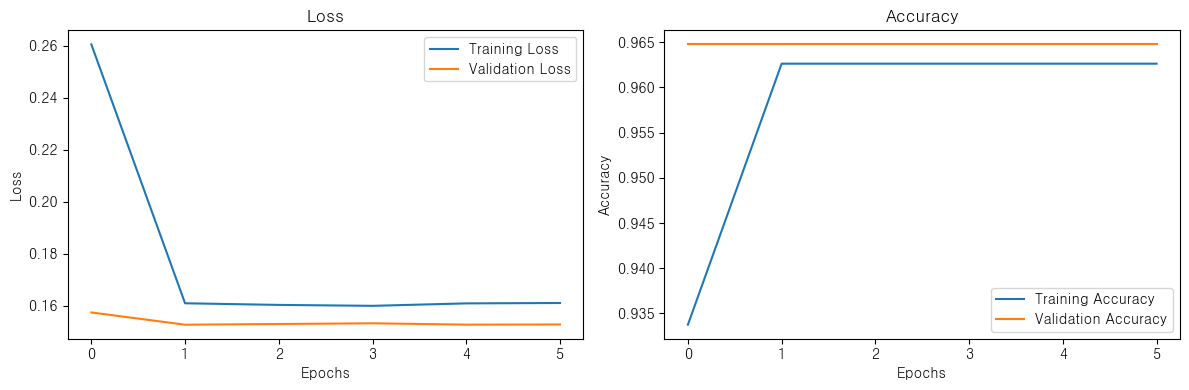

In [115]:
# 학습 결과 시각화
def plot_history(history):
    # 학습 및 검증 손실
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # 학습 및 검증 정확도
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# 학습 결과 시각화 함수 호출
plot_history(history)